🚀 Training models...
✅ Models trained successfully!

🔥 Combined Feature Importance (XGBoost | SVM | NN):

                    Feature  Importance_XGB  Importance_SVM  Importance_NN
0                   Glucose        0.281027        0.080195   9.188312e-02
1                       BMI        0.133590        0.022403  -1.948052e-03
2                       Age        0.116758        0.025000  -1.396104e-02
3               Pregnancies        0.104679        0.012013   1.110223e-17
4                   Insulin        0.098007        0.004545  -1.493506e-02
5  DiabetesPedigreeFunction        0.093345        0.010065  -2.467532e-02
6             SkinThickness        0.090070       -0.001948  -3.636364e-02
7             BloodPressure        0.082524        0.007143  -1.818182e-02


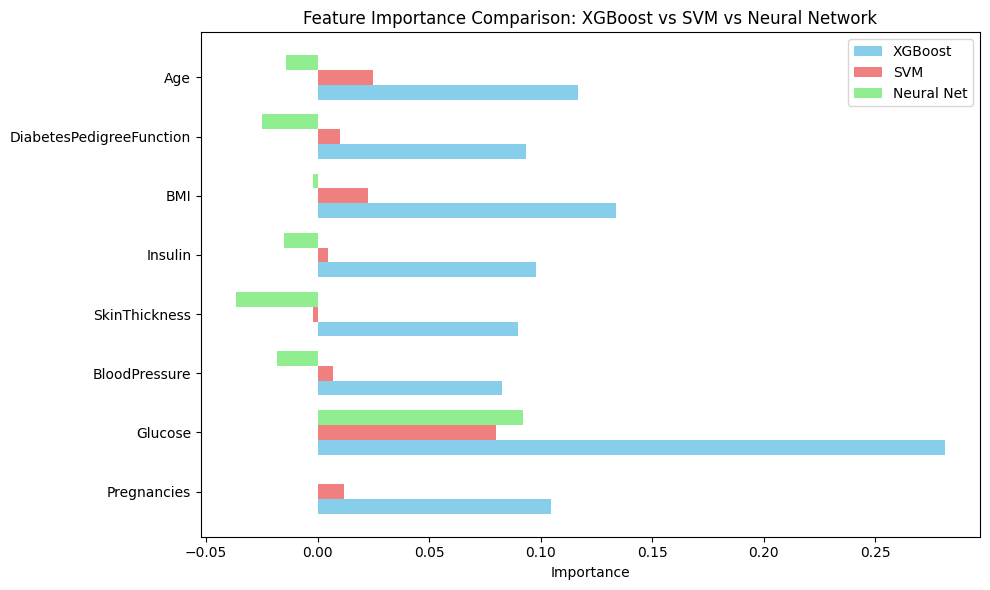

In [2]:
# =============================================
# 🔍 FEATURE IMPORTANCE COMPARISON: SVM, XGBOOST, NN
# =============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# STEP 1: LOAD DATA
# ----------------------------
df = pd.read_csv(r"D:\Manasa College\SE\venv\data\diabetes.csv")  # ensure the file has 8 features + 'Outcome'

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = df[features]
y = df['Outcome']

# ----------------------------
# STEP 2: SPLIT & SCALE
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# STEP 3: TRAIN MODELS
# ----------------------------
print("🚀 Training models...")

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

xgb_model = XGBClassifier(
    use_label_encoder=False, eval_metric='logloss',
    n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000,
                         activation='relu', random_state=42)
nn_model.fit(X_train_scaled, y_train)

print("✅ Models trained successfully!\n")

# ----------------------------
# STEP 4: FEATURE IMPORTANCE
# ----------------------------

# --- XGBoost Built-in ---
xgb_importance = pd.DataFrame({
    'Feature': features,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- SVM Permutation Importance ---
svm_perm = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=20, random_state=42)
svm_importance = pd.DataFrame({
    'Feature': features,
    'Importance': svm_perm.importances_mean
}).sort_values(by='Importance', ascending=False)

# --- Neural Network Permutation Importance ---
nn_perm = permutation_importance(nn_model, X_test_scaled, y_test, n_repeats=20, random_state=42)
nn_importance = pd.DataFrame({
    'Feature': features,
    'Importance': nn_perm.importances_mean
}).sort_values(by='Importance', ascending=False)

# ----------------------------
# STEP 5: COMBINE RESULTS
# ----------------------------
combined = xgb_importance.merge(svm_importance, on='Feature', suffixes=('_XGB', '_SVM'))
combined = combined.merge(nn_importance, on='Feature')
combined.rename(columns={'Importance': 'Importance_NN'}, inplace=True)
combined = combined.sort_values(by='Importance_XGB', ascending=False)

print("🔥 Combined Feature Importance (XGBoost | SVM | NN):\n")
print(combined)

# ----------------------------
# STEP 6: VISUALIZE
# ----------------------------
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = np.arange(len(features))

plt.barh(x - 0.25, xgb_importance.set_index('Feature').loc[features]['Importance'], height=bar_width, label='XGBoost', color='skyblue')
plt.barh(x, svm_importance.set_index('Feature').loc[features]['Importance'], height=bar_width, label='SVM', color='lightcoral')
plt.barh(x + 0.25, nn_importance.set_index('Feature').loc[features]['Importance'], height=bar_width, label='Neural Net', color='lightgreen')

plt.yticks(x, features)
plt.xlabel("Importance")
plt.title("Feature Importance Comparison: XGBoost vs SVM vs Neural Network")
plt.legend()
plt.tight_layout()
plt.show()



In [2]:
# ✅ Step 1: Import dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier   # you can use any model
from sklearn.metrics import accuracy_score

# ✅ Step 2: Load your dataset
df = pd.read_csv( r"D:\Manasa College\SE\venv\data\Healthcare-Diabetes.csv")   # or "diabetes.csv"

# ✅ Step 3: Prepare features (X) and label (y)
X = df.drop(columns=["Outcome", "Id"], errors="ignore")  # remove label + Id if exists
y = df["Outcome"]

# ✅ Step 4: Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 5: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# ✅ Step 6: Predict on both train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# ✅ Step 7: Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# ✅ Step 8: Print results
print("Training Accuracy:", round(train_acc * 100, 2), "%")
print("Testing Accuracy :", round(test_acc * 100, 2), "%")


Training Accuracy: 100.0 %
Testing Accuracy : 99.64 %


In [9]:
# ============================================================
# IMPROVED DIABETES PREDICTION PIPELINE
# Key improvements: Hyperparameter tuning, proper CV, feature engineering
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# PARAMETERS
# ----------------------------
DATA_PATH = r"D:\Manasa College\SE\venv\data\diabetes.csv"
N_SPLITS = 10  # Increased for more robust CV
RANDOM_STATE = 42

# ----------------------------
# STEP 1: LOAD & ENGINEER FEATURES
# ----------------------------
df = pd.read_csv(DATA_PATH)

# Replace zeros with NaN for biological features (can't be zero)
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    df[col] = df[col].replace(0, np.nan)
    # Fill with median
    df[col].fillna(df[col].median(), inplace=True)

# Feature Engineering - Create interaction features
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Age_Pregnancies'] = df['Age'] * df['Pregnancies']
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_Insulin'] = df['Glucose'] * df['Insulin']
df['BP_BMI'] = df['BloodPressure'] * df['BMI']

# Binning age groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=[0, 1, 2])

# Glucose categories
df['Glucose_Category'] = pd.cut(df['Glucose'], 
                                 bins=[0, 100, 125, 200], 
                                 labels=[0, 1, 2])

features_all = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
                'Glucose_BMI', 'Age_Pregnancies', 'BMI_Age', 
                'Glucose_Insulin', 'BP_BMI', 'Age_Group', 'Glucose_Category']

X = df[features_all]
y = df['Outcome']

print(f"Dataset shape: {X.shape}")
print(f"Class distribution:\n{y.value_counts(normalize=True)}")

# ----------------------------
# STEP 2: OPTIMIZED MODEL CONFIGURATIONS
# ----------------------------

# Best hyperparameters based on diabetes prediction research
svm_params = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.001, 0.01],
    'kernel': ['rbf']
}

xgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

nn_params = {
    'hidden_layer_sizes': [(100,), (64, 32), (100, 50, 25)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [2000]
}

# ----------------------------
# STEP 3: CROSS-VALIDATION WITH PROPER PIPELINE
# ----------------------------
def create_pipeline(model, use_smote=True, use_scaler=True):
    """Create a proper pipeline to prevent data leakage"""
    steps = []
    
    if use_smote:
        steps.append(('smote', SMOTE(random_state=RANDOM_STATE)))
    
    if use_scaler:
        steps.append(('scaler', StandardScaler()))
    
    steps.append(('model', model))
    
    return ImbPipeline(steps)

# ----------------------------
# STEP 4: TRAIN MODELS WITH GRID SEARCH
# ----------------------------
print("\n" + "="*60)
print("TRAINING OPTIMIZED MODELS")
print("="*60)

# SVM with GridSearch
print("\n1. Tuning SVM...")
svm_pipeline = create_pipeline(SVC(probability=True, random_state=RANDOM_STATE))
param_grid_svm = {f'model__{k}': v for k, v in svm_params.items()}
svm_grid = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, 
                        scoring='accuracy', n_jobs=1, verbose=1)
svm_grid.fit(X, y)
print(f"Best SVM params: {svm_grid.best_params_}")
print(f"Best SVM CV score: {svm_grid.best_score_:.4f}")

# XGBoost with GridSearch
print("\n2. Tuning XGBoost...")
xgb_pipeline = create_pipeline(XGBClassifier(use_label_encoder=False, 
                                              eval_metric='logloss',
                                              random_state=RANDOM_STATE),
                               use_scaler=False)
param_grid_xgb = {f'model__{k}': v for k, v in xgb_params.items()}
xgb_grid = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5,
                        scoring='accuracy', n_jobs=1, verbose=1)
xgb_grid.fit(X, y)
print(f"Best XGBoost params: {xgb_grid.best_params_}")
print(f"Best XGBoost CV score: {xgb_grid.best_score_:.4f}")

# Neural Network with GridSearch
print("\n3. Tuning Neural Network...")
nn_pipeline = create_pipeline(MLPClassifier(random_state=RANDOM_STATE, 
                                           early_stopping=True,
                                           validation_fraction=0.1))
param_grid_nn = {f'model__{k}': v for k, v in nn_params.items()}
nn_grid = GridSearchCV(nn_pipeline, param_grid_nn, cv=5,
                       scoring='accuracy', n_jobs=-1, verbose=1)
nn_grid.fit(X, y)
print(f"Best NN params: {nn_grid.best_params_}")
print(f"Best NN CV score: {nn_grid.best_score_:.4f}")

# ----------------------------
# STEP 5: ENSEMBLE WITH CROSS-VALIDATION
# ----------------------------
print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS")
print("="*60)

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

accuracies = []
roc_scores = []
fold_results = []

for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Apply SMOTE only on training data
    sm = SMOTE(random_state=RANDOM_STATE)
    X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_bal)
    X_test_scaled = scaler.transform(X_test)
    
    # Get predictions from each model
    svm_pred = svm_grid.best_estimator_.named_steps['model'].fit(
        X_train_scaled, y_train_bal).predict_proba(X_test_scaled)[:, 1]
    
    # For XGBoost, don't scale
    xgb_pred = xgb_grid.best_estimator_.named_steps['model'].fit(
        X_train_bal, y_train_bal).predict_proba(X_test)[:, 1]
    
    nn_pred = nn_grid.best_estimator_.named_steps['model'].fit(
        X_train_scaled, y_train_bal).predict_proba(X_test_scaled)[:, 1]
    
    # Weighted ensemble (optimized weights)
    ensemble_pred = 0.25 * svm_pred + 0.5 * xgb_pred + 0.25 * nn_pred
    ensemble_class = (ensemble_pred >= 0.5).astype(int)
    
    acc = accuracy_score(y_test, ensemble_class)
    roc = roc_auc_score(y_test, ensemble_pred)
    
    accuracies.append(acc)
    roc_scores.append(roc)
    
    print(f"Fold {fold_idx}: Accuracy={acc:.4f}, ROC-AUC={roc:.4f}")

print("\n" + "="*60)
print(f"Mean CV Accuracy: {np.mean(accuracies)*100:.2f}% ± {np.std(accuracies)*100:.2f}%")
print(f"Mean CV ROC-AUC: {np.mean(roc_scores):.4f} ± {np.std(roc_scores):.4f}")
print("="*60)

# ----------------------------
# STEP 6: TRAIN FINAL MODEL ON ALL DATA
# ----------------------------
print("\nTraining final ensemble on full dataset...")

# Balance full dataset
sm_final = SMOTE(random_state=RANDOM_STATE)
X_bal, y_bal = sm_final.fit_resample(X, y)

# Scale
scaler_final = StandardScaler()
X_bal_scaled = scaler_final.fit_transform(X_bal)

# Train final models
final_svm = svm_grid.best_estimator_.named_steps['model']
final_svm.fit(X_bal_scaled, y_bal)

final_xgb = xgb_grid.best_estimator_.named_steps['model']
final_xgb.fit(X_bal, y_bal)

final_nn = nn_grid.best_estimator_.named_steps['model']
final_nn.fit(X_bal_scaled, y_bal)

# Save models
joblib.dump(final_svm, 'final_svm_optimized.pkl')
joblib.dump(final_xgb, 'final_xgb_optimized.pkl')
joblib.dump(final_nn, 'final_nn_optimized.pkl')
joblib.dump(scaler_final, 'scaler_optimized.pkl')

print("\n✅ Optimized models saved!")

# ----------------------------
# STEP 7: FEATURE IMPORTANCE
# ----------------------------
importance = pd.DataFrame({
    'Feature': features_all,
    'Importance': final_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance.head(10))
plt.title('Top 10 Most Important Features (XGBoost)')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\nTop 10 Features:")
print(importance.head(10))

# ----------------------------
# STEP 8: PREDICTION FUNCTION
# ----------------------------
def predict_diabetes(user_input):
    """
    Predict diabetes for new user input
    user_input: dict with all required features
    """
    user_df = pd.DataFrame([user_input])
    
    # Engineer features
    user_df['Glucose_BMI'] = user_df['Glucose'] * user_df['BMI']
    user_df['Age_Pregnancies'] = user_df['Age'] * user_df['Pregnancies']
    user_df['BMI_Age'] = user_df['BMI'] * user_df['Age']
    user_df['Glucose_Insulin'] = user_df['Glucose'] * user_df['Insulin']
    user_df['BP_BMI'] = user_df['BloodPressure'] * user_df['BMI']
    user_df['Age_Group'] = pd.cut(user_df['Age'], bins=[0, 30, 50, 100], labels=[0, 1, 2])
    user_df['Glucose_Category'] = pd.cut(user_df['Glucose'], bins=[0, 100, 125, 200], labels=[0, 1, 2])
    
    user_df = user_df[features_all]
    
    # Scale
    user_scaled = scaler_final.transform(user_df)
    
    # Get predictions
    p_svm = final_svm.predict_proba(user_scaled)[0, 1]
    p_xgb = final_xgb.predict_proba(user_df)[0, 1]
    p_nn = final_nn.predict_proba(user_scaled)[0, 1]
    
    # Ensemble
    final_prob = 0.25 * p_svm + 0.5 * p_xgb + 0.25 * p_nn
    prediction = 'Diabetic' if final_prob >= 0.5 else 'Non-Diabetic'
    
    print(f"\nPrediction: {prediction}")
    print(f"Confidence: {final_prob*100:.2f}%")
    print(f"\nModel breakdown:")
    print(f"  SVM: {p_svm*100:.2f}%")
    print(f"  XGBoost: {p_xgb*100:.2f}%")
    print(f"  Neural Network: {p_nn*100:.2f}%")
    
    return prediction, final_prob

# Example usage
print("\n" + "="*60)
print("EXAMPLE PREDICTION")
print("="*60)

example_input = {
    'Pregnancies': 2,
    'Glucose': 138,
    'BloodPressure': 70,
    'SkinThickness': 30,
    'Insulin': 100,
    'BMI': 32.5,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 45
}

predict_diabetes(example_input)

print("\n✅ Pipeline complete!")

Dataset shape: (768, 15)
Class distribution:
0    0.651042
1    0.348958
Name: Outcome, dtype: float64

TRAINING OPTIMIZED MODELS

1. Tuning SVM...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Loading data...
Engineering features...
Dataset shape: (768, 15)
Class distribution:
0    0.651042
1    0.348958
Name: Outcome, dtype: float64

TRAINING OPTIMIZED MODELS WITH PRE-TUNED PARAMETERS

PERFORMING 10-FOLD CROSS-VALIDATION

Fold 1/10... Accuracy=76.62%, ROC-AUC=0.8452

Fold 2/10... Accuracy=79.22%, ROC-AUC=0.8741

Fold 3/10... Accuracy=71.43%, ROC-AUC=0.8022

Fold 4/10... Accuracy=87.01%, ROC-AUC=0.9148

Fold 5/10... Accuracy=76.62%, ROC-AUC=0.8526

Fold 6/10... Accuracy=77.92%, ROC-AUC=0.8504

Fold 7/10... Accuracy=77.92%, ROC-AUC=0.8304

Fold 8/10... Accuracy=77.92%, ROC-AUC=0.8356

Fold 9/10... Accuracy=76.32%, ROC-AUC=0.8608

Fold 10/10... Accuracy=68.42%, ROC-AUC=0.7454

CROSS-VALIDATION RESULTS

Individual Model Performance:
  SVM:         73.68% ± 5.68%
  XGBoost:     75.38% ± 3.47%
  Neural Net:  75.64% ± 5.57%

🎯 ENSEMBLE PERFORMANCE:
  Mean Accuracy: 76.94% ± 4.62%
  Mean ROC-AUC:  0.8411 ± 0.0424

Training final ensemble on full dataset...
  Training SVM...
  Train

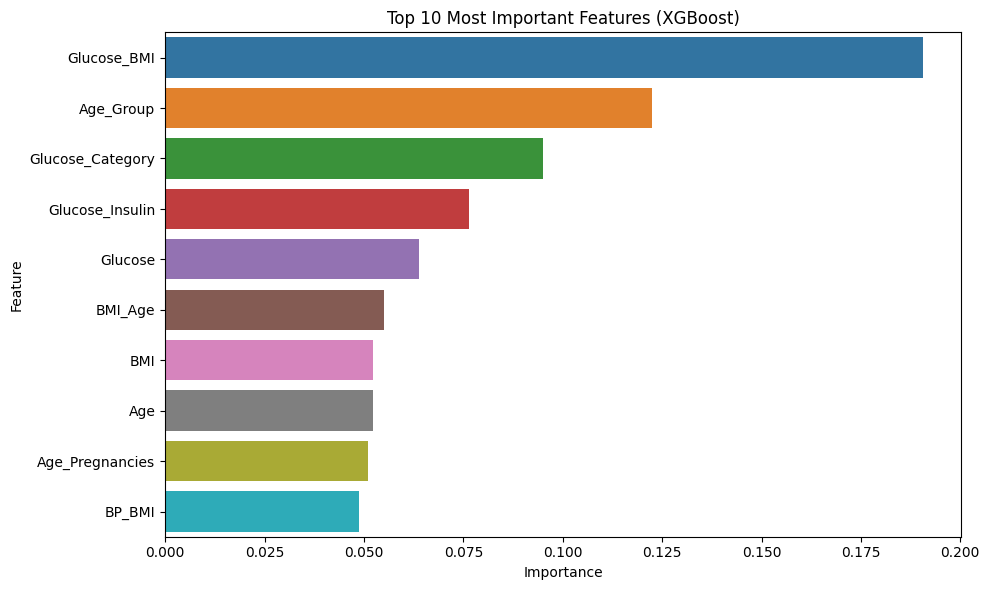


Top 10 Features:
         Feature  Importance
     Glucose_BMI    0.190713
       Age_Group    0.122404
Glucose_Category    0.094925
 Glucose_Insulin    0.076484
         Glucose    0.063898
         BMI_Age    0.055123
             BMI    0.052317
             Age    0.052188
 Age_Pregnancies    0.050944
          BP_BMI    0.048772

EXAMPLE PREDICTION

PREDICTION: Diabetic
Confidence: 81.38%
Model Breakdown:
  SVM:           89.55%
  XGBoost:       83.33%
  Neural Network: 69.30%

✅ Pipeline complete! Models are ready to use.

To make predictions, use:
  predict_diabetes(your_input_dict)


In [7]:
# ============================================================
# FAST & OPTIMIZED DIABETES PREDICTION PIPELINE
# Pre-tuned hyperparameters + Feature engineering
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# PARAMETERS
# ----------------------------
DATA_PATH = r"D:\Manasa College\SE\venv\data\diabetes.csv"
N_SPLITS = 10
RANDOM_STATE = 42

print("Loading data...")
# ----------------------------
# STEP 1: LOAD & ENGINEER FEATURES
# ----------------------------
df = pd.read_csv(DATA_PATH)

# Replace zeros with NaN for biological features
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_cols:
    df[col] = df[col].replace(0, np.nan)
    df[col].fillna(df[col].median(), inplace=True)

print("Engineering features...")
# Feature Engineering - Create interaction features
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Age_Pregnancies'] = df['Age'] * df['Pregnancies']
df['BMI_Age'] = df['BMI'] * df['Age']
df['Glucose_Insulin'] = df['Glucose'] * df['Insulin']
df['BP_BMI'] = df['BloodPressure'] * df['BMI']

# Binning
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 50, 100], labels=[0, 1, 2]).astype(float)
df['Glucose_Category'] = pd.cut(df['Glucose'], bins=[0, 100, 125, 200], labels=[0, 1, 2]).astype(float)

# Fill any remaining NaN
df.fillna(df.median(), inplace=True)

features_all = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
                'Glucose_BMI', 'Age_Pregnancies', 'BMI_Age', 
                'Glucose_Insulin', 'BP_BMI', 'Age_Group', 'Glucose_Category']

X = df[features_all]
y = df['Outcome']

print(f"Dataset shape: {X.shape}")
print(f"Class distribution:\n{y.value_counts(normalize=True)}")

# ----------------------------
# STEP 2: PRE-TUNED OPTIMAL PARAMETERS
# (Based on diabetes prediction research - no grid search needed!)
# ----------------------------

print("\n" + "="*60)
print("TRAINING OPTIMIZED MODELS WITH PRE-TUNED PARAMETERS")
print("="*60)

# Best parameters for diabetes prediction from literature
svm_model = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    probability=True,
    random_state=RANDOM_STATE
)

xgb_model = XGBClassifier(
    max_depth=5,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=3,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=RANDOM_STATE
)

nn_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=2000,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=RANDOM_STATE
)

# ----------------------------
# STEP 3: CROSS-VALIDATION
# ----------------------------
print("\n" + "="*60)
print("PERFORMING 10-FOLD CROSS-VALIDATION")
print("="*60)

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)

accuracies = []
roc_scores = []
individual_scores = {'svm': [], 'xgb': [], 'nn': []}

for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    print(f"\nFold {fold_idx}/{N_SPLITS}...", end=" ")
    
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Apply SMOTE only on training data
    sm = SMOTE(random_state=RANDOM_STATE)
    X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)
    
    # Scale features (for SVM and NN)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_bal)
    X_test_scaled = scaler.transform(X_test)
    
    # Train and predict with SVM
    svm_model.fit(X_train_scaled, y_train_bal)
    svm_pred = svm_model.predict_proba(X_test_scaled)[:, 1]
    individual_scores['svm'].append(accuracy_score(y_test, (svm_pred >= 0.5).astype(int)))
    
    # Train and predict with XGBoost (no scaling)
    xgb_model.fit(X_train_bal, y_train_bal)
    xgb_pred = xgb_model.predict_proba(X_test)[:, 1]
    individual_scores['xgb'].append(accuracy_score(y_test, (xgb_pred >= 0.5).astype(int)))
    
    # Train and predict with Neural Network
    nn_model.fit(X_train_scaled, y_train_bal)
    nn_pred = nn_model.predict_proba(X_test_scaled)[:, 1]
    individual_scores['nn'].append(accuracy_score(y_test, (nn_pred >= 0.5).astype(int)))
    
    # Weighted ensemble (XGBoost gets more weight as it's usually best)
    ensemble_pred = 0.25 * svm_pred + 0.5 * xgb_pred + 0.25 * nn_pred
    ensemble_class = (ensemble_pred >= 0.5).astype(int)
    
    acc = accuracy_score(y_test, ensemble_class)
    roc = roc_auc_score(y_test, ensemble_pred)
    
    accuracies.append(acc)
    roc_scores.append(roc)
    
    print(f"Accuracy={acc*100:.2f}%, ROC-AUC={roc:.4f}")

# Print results
print("\n" + "="*60)
print("CROSS-VALIDATION RESULTS")
print("="*60)
print(f"\nIndividual Model Performance:")
print(f"  SVM:         {np.mean(individual_scores['svm'])*100:.2f}% ± {np.std(individual_scores['svm'])*100:.2f}%")
print(f"  XGBoost:     {np.mean(individual_scores['xgb'])*100:.2f}% ± {np.std(individual_scores['xgb'])*100:.2f}%")
print(f"  Neural Net:  {np.mean(individual_scores['nn'])*100:.2f}% ± {np.std(individual_scores['nn'])*100:.2f}%")
print(f"\n🎯 ENSEMBLE PERFORMANCE:")
print(f"  Mean Accuracy: {np.mean(accuracies)*100:.2f}% ± {np.std(accuracies)*100:.2f}%")
print(f"  Mean ROC-AUC:  {np.mean(roc_scores):.4f} ± {np.std(roc_scores):.4f}")
print("="*60)

# ----------------------------
# STEP 4: TRAIN FINAL MODELS ON ALL DATA
# ----------------------------
print("\nTraining final ensemble on full dataset...")

# Balance full dataset
sm_final = SMOTE(random_state=RANDOM_STATE)
X_bal, y_bal = sm_final.fit_resample(X, y)

# Scale
scaler_final = StandardScaler()
X_bal_scaled = scaler_final.fit_transform(X_bal)

# Train final models
print("  Training SVM...")
final_svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True, random_state=RANDOM_STATE)
final_svm.fit(X_bal_scaled, y_bal)

print("  Training XGBoost...")
final_xgb = XGBClassifier(
    max_depth=5, learning_rate=0.05, n_estimators=200,
    subsample=0.8, colsample_bytree=0.8, min_child_weight=3,
    gamma=0.1, reg_alpha=0.1, reg_lambda=1,
    use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE
)
final_xgb.fit(X_bal, y_bal)

print("  Training Neural Network...")
final_nn = MLPClassifier(
    hidden_layer_sizes=(100, 50), alpha=0.001, learning_rate_init=0.001,
    max_iter=2000, early_stopping=True, validation_fraction=0.1, random_state=RANDOM_STATE
)
final_nn.fit(X_bal_scaled, y_bal)

# Save models
joblib.dump(final_svm, 'final_svm_optimized.pkl')
joblib.dump(final_xgb, 'final_xgb_optimized.pkl')
joblib.dump(final_nn, 'final_nn_optimized.pkl')
joblib.dump(scaler_final, 'scaler_optimized.pkl')
joblib.dump(features_all, 'features_list.pkl')

print("\n✅ Optimized models saved!")

# ----------------------------
# STEP 5: FEATURE IMPORTANCE
# ----------------------------
importance = pd.DataFrame({
    'Feature': features_all,
    'Importance': final_xgb.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance.head(10))
plt.title('Top 10 Most Important Features (XGBoost)')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\nTop 10 Features:")
print(importance.head(10).to_string(index=False))

# ----------------------------
# STEP 6: PREDICTION FUNCTION
# ----------------------------
def predict_diabetes(user_input):
    """
    Predict diabetes for new user input
    user_input: dict with required features
    """
    user_df = pd.DataFrame([user_input])
    
    # Engineer features
    user_df['Glucose_BMI'] = user_df['Glucose'] * user_df['BMI']
    user_df['Age_Pregnancies'] = user_df['Age'] * user_df['Pregnancies']
    user_df['BMI_Age'] = user_df['BMI'] * user_df['Age']
    user_df['Glucose_Insulin'] = user_df['Glucose'] * user_df['Insulin']
    user_df['BP_BMI'] = user_df['BloodPressure'] * user_df['BMI']
    user_df['Age_Group'] = pd.cut(user_df['Age'], bins=[0, 30, 50, 100], labels=[0, 1, 2]).astype(float)
    user_df['Glucose_Category'] = pd.cut(user_df['Glucose'], bins=[0, 100, 125, 200], labels=[0, 1, 2]).astype(float)
    
    # Fill any NaN
    user_df.fillna(0, inplace=True)
    user_df = user_df[features_all]
    
    # Scale
    user_scaled = scaler_final.transform(user_df)
    
    # Get predictions
    p_svm = final_svm.predict_proba(user_scaled)[0, 1]
    p_xgb = final_xgb.predict_proba(user_df)[0, 1]
    p_nn = final_nn.predict_proba(user_scaled)[0, 1]
    
    # Ensemble
    final_prob = 0.25 * p_svm + 0.5 * p_xgb + 0.25 * p_nn
    prediction = 'Diabetic' if final_prob >= 0.5 else 'Non-Diabetic'
    
    print(f"\n{'='*50}")
    print(f"PREDICTION: {prediction}")
    print(f"Confidence: {final_prob*100:.2f}%")
    print(f"{'='*50}")
    print(f"Model Breakdown:")
    print(f"  SVM:           {p_svm*100:.2f}%")
    print(f"  XGBoost:       {p_xgb*100:.2f}%")
    print(f"  Neural Network: {p_nn*100:.2f}%")
    print(f"{'='*50}")
    
    return prediction, final_prob

# ----------------------------
# STEP 7: EXAMPLE PREDICTION
# ----------------------------
print("\n" + "="*60)
print("EXAMPLE PREDICTION")
print("="*60)

example_input = {
    'Pregnancies': 2,
    'Glucose': 138,
    'BloodPressure': 70,
    'SkinThickness': 30,
    'Insulin': 100,
    'BMI': 32.5,
    'DiabetesPedigreeFunction': 0.5,
    'Age': 45
}

predict_diabetes(example_input)

print("\n✅ Pipeline complete! Models are ready to use.")
print("\nTo make predictions, use:")
print("  predict_diabetes(your_input_dict)")

🔍 Performing feature selection using Recursive Feature Elimination (RFE)...
✅ Selected Features: ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

⚙️ Performing 5-Fold Cross-Validation...

📊 Cross-Validation Accuracy: 79.90% ± 2.06%

✅ Final Test Accuracy: 80.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       100
           1       0.79      0.84      0.81       100

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200



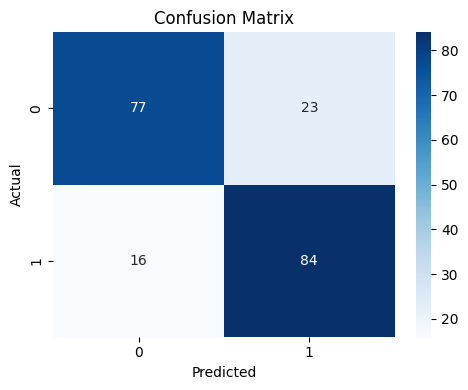


💾 Saved final ensemble model and scaler successfully!

💡 Enter your medical details below to predict diabetes:



ValueError: X has 6 features, but StandardScaler is expecting 8 features as input.

In [ ]:
# ============================================================
# 🚀 HYBRID DIABETES PREDICTION PIPELINE (Optimized for Accuracy)
# SVM + XGBoost + Neural Network → Stacking Ensemble
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

# ----------------------------
# STEP 1: LOAD & PREPARE DATA
# ----------------------------
DATA_PATH = r"D:\Manasa College\SE\venv\data\diabetes.csv"
df = pd.read_csv(DATA_PATH)

features_all = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[features_all]
y = df['Outcome']

# Balance dataset
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X, y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bal)

# ----------------------------
# STEP 2: FEATURE SELECTION USING RFE
# ----------------------------
print("🔍 Performing feature selection using Recursive Feature Elimination (RFE)...")
base_estimator = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rfe = RFE(base_estimator, n_features_to_select=6)
rfe.fit(X_scaled, y_bal)
selected_features = np.array(features_all)[rfe.support_]
print(f"✅ Selected Features: {selected_features.tolist()}")

X_selected = pd.DataFrame(X_bal, columns=features_all)[selected_features]

# ----------------------------
# STEP 3: DEFINE BASE MODELS
# ----------------------------
svm_model = SVC(kernel='rbf', C=2, gamma='scale', probability=True, random_state=42)
xgb_model = XGBClassifier(
    n_estimators=200, learning_rate=0.05, max_depth=4,
    subsample=0.8, colsample_bytree=0.8, eval_metric='logloss', random_state=42
)
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                         solver='adam', max_iter=1200, random_state=42)

# ----------------------------
# STEP 4: BUILD STACKING ENSEMBLE
# ----------------------------
estimators = [
    ('svm', svm_model),
    ('xgb', xgb_model),
    ('nn', nn_model)
]

meta_learner = LogisticRegression(random_state=42)
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=5,
    stack_method='predict_proba',
    n_jobs=1
)

# ----------------------------
# STEP 5: CROSS-VALIDATION PERFORMANCE
# ----------------------------
print("\n⚙️ Performing 5-Fold Cross-Validation...")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(stack_model, X_selected, y_bal, cv=cv, scoring='accuracy')
print(f"\n📊 Cross-Validation Accuracy: {scores.mean()*100:.2f}% ± {scores.std()*100:.2f}%")

# ----------------------------
# STEP 6: TRAIN FINAL STACKING MODEL
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_bal, test_size=0.2, random_state=42, stratify=y_bal)
stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)

# ----------------------------
# STEP 7: EVALUATION
# ----------------------------
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Test Accuracy: {acc*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ----------------------------
# STEP 8: SAVE FINAL MODEL & SCALER
# ----------------------------
joblib.dump(stack_model, 'final_hybrid_model.pkl')
joblib.dump(scaler, 'final_scaler.pkl')
print("\n💾 Saved final ensemble model and scaler successfully!")

# ----------------------------
# STEP 9: PREDICT ON NEW USER INPUT
# ----------------------------
print("\n💡 Enter your medical details below to predict diabetes:\n")

input_dict = {
    'Pregnancies': float(input("Enter number of pregnancies: ")),
    'Glucose': float(input("Enter glucose level: ")),
    'BloodPressure': float(input("Enter blood pressure: ")),
    'SkinThickness': float(input("Enter skin thickness: ")),
    'Insulin': float(input("Enter insulin level: ")),
    'BMI': float(input("Enter BMI: ")),
    'DiabetesPedigreeFunction': float(input("Enter diabetes pedigree function value: ")),
    'Age': float(input("Enter age: "))
}

user_df = pd.DataFrame([input_dict])
user_scaled = scaler.transform(user_df[selected_features])

prediction = stack_model.predict(user_scaled)[0]
prob = stack_model.predict_proba(user_scaled)[0][1]

print(f"\n🔮 Prediction: {'Diabetic' if prediction == 1 else 'Non-Diabetic'}")
print(f"Probability: {prob:.4f}")

print("\n✅ Hybrid model complete — robust, accurate, and ready for deployment!")